In [18]:
import tkinter as tk
from tkinter import filedialog
import numpy as np 
from matplotlib import pyplot as plt 
from PIL import Image
import cv2
from skimage import measure
from matplotlib.gridspec import GridSpec

In [19]:

img=Image.open('manox.png').convert('L')
pix_val=list(img.getdata())
print("Maximo= ", np.max(pix_val))
print("Minimo= ", np.min(pix_val))
img=np.array(img)
[n,m]=img.shape
print(n)
print(m)


Maximo=  255
Minimo=  0
1024
896


Umbral Otsu =  72.0
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
Cantidad de islas =  13


(-0.5, 895.5, 1023.5, -0.5)

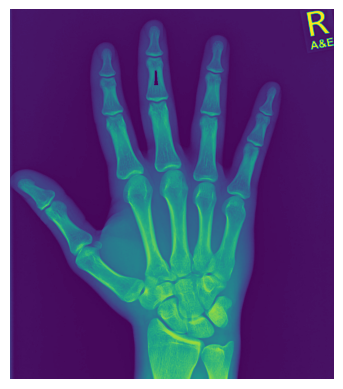

In [20]:
umbral,img_bw = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print("Umbral Otsu = ", umbral)
plt.imshow(img_bw,cmap="gray")
kernel = np.ones((15,15),np.uint8)
print(kernel)
img_eroded = cv2.erode(img_bw, kernel, iterations=2)
plt.imshow(img_eroded,cmap="gray")
blobs_labels = measure.label(img_eroded,background=0)
print("Cantidad de islas = ", np.max(blobs_labels))
plt.axis("off")
mask = np.where(blobs_labels==1, 0,1)
mask = np.logical_not(mask)
img_mask = np.copy(img)
img_mask[mask] = 0
plt.imshow(img_mask)
plt.axis("off")

Umbral Otsu =  72.0
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
Cantidad de islas =  2


(-0.5, 895.5, 1023.5, -0.5)

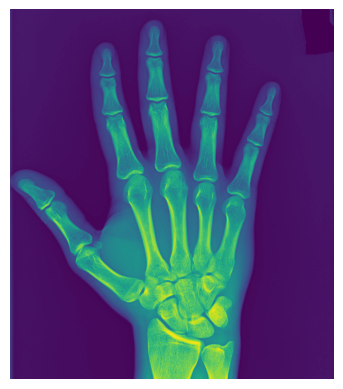

In [21]:
umbral,img_bw = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print("Umbral Otsu = ", umbral)
plt.imshow(img_bw,cmap="gray")
kernel = np.ones((15,15),np.uint8)
print(kernel)
img_dilate = cv2.dilate(img_bw,kernel,iterations=2)
plt.imshow(img_eroded,cmap="gray")
blobs_labels = measure.label(img_dilate,background=0)
print("Cantidad de islas = ", np.max(blobs_labels))
plt.axis("off")
mask = np.where(blobs_labels==1, 0,1)
mask = np.logical_not(mask)
img_mask = np.copy(img)
img_mask[mask] = 0
plt.imshow(img_mask)
plt.axis("off")